In [1]:
import pandas as pd
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
import warnings
warnings.filterwarnings('ignore')
import scipy
from sklearn.decomposition import PCA

In [2]:
df=pd.read_csv("auto mobile insurance claim fraud.csv",)

In [3]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [4]:
df1=df

In [5]:
missing_values = [ "?"]
df1 = pd.read_csv("auto mobile insurance claim fraud.csv", na_values = missing_values)

In [6]:
df1.isnull().sum()
#missing values are present

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                  178
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [7]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [8]:
#lets remove missing values
cols=["_c39"]
df[cols]=df[cols].fillna(df.mean().iloc[0])

In [9]:
cols = ["police_report_available","property_damage","collision_type"]

df1[cols]=df1[cols].fillna(df1.mode().iloc[0])

In [10]:
df1.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,NO,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [11]:
#lets drop the last column because it has no values present
df.drop('_c39',axis=1,inplace=True)

In [12]:
df.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    4
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

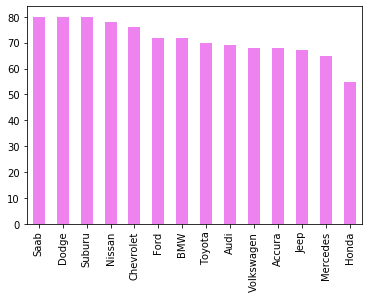

In [13]:
df['auto_make'].value_counts().plot.bar(color="violet")

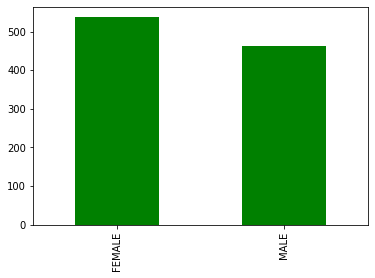

In [14]:
df['insured_sex'].value_counts().plot.bar(color="green")
#insured female are more than male

In [15]:
crosstabcat = pd.crosstab([df.incident_type,df.insured_sex,df.insured_relationship], df['fraud_reported'],normalize='columns')
print(crosstabcat)

fraud_reported                                                    N         Y
incident_type            insured_sex insured_relationship                    
Multi-vehicle Collision  FEMALE      husband               0.045153  0.048583
                                     not-in-family         0.035857  0.032389
                                     other-relative        0.031873  0.040486
                                     own-child             0.051793  0.040486
                                     unmarried             0.025232  0.032389
                                     wife                  0.030544  0.036437
                         MALE        husband               0.037185  0.032389
                                     not-in-family         0.027888  0.048583
                                     other-relative        0.035857  0.056680
                                     own-child             0.030544  0.040486
                                     unmarried             0.030

Text(0.5, 0.98, 'fraud reported Counts by whether police report available or not ')

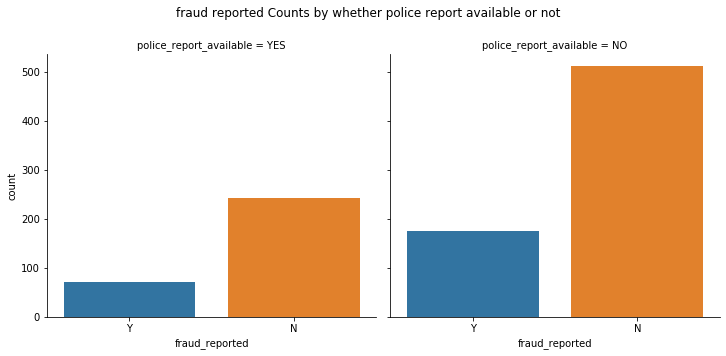

In [16]:
sns.factorplot("fraud_reported", col="police_report_available", data=df1, kind="count", col_wrap=2, size=5)
plt.subplots_adjust(top=.85)
plt.suptitle('fraud reported Counts by whether police report available or not ')

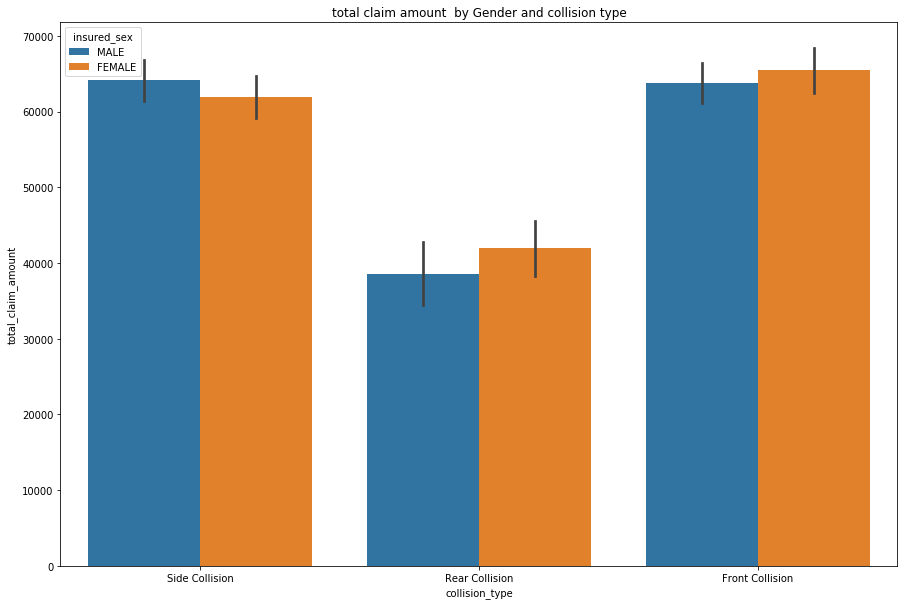

In [17]:
plt.figure(figsize=(15,10))
plt.title('total claim amount  by Gender and collision type')
sns.barplot(x="collision_type", y="total_claim_amount", hue="insured_sex", data=df1)

Text(0.5, 1.0, 'car models vs claim amount')

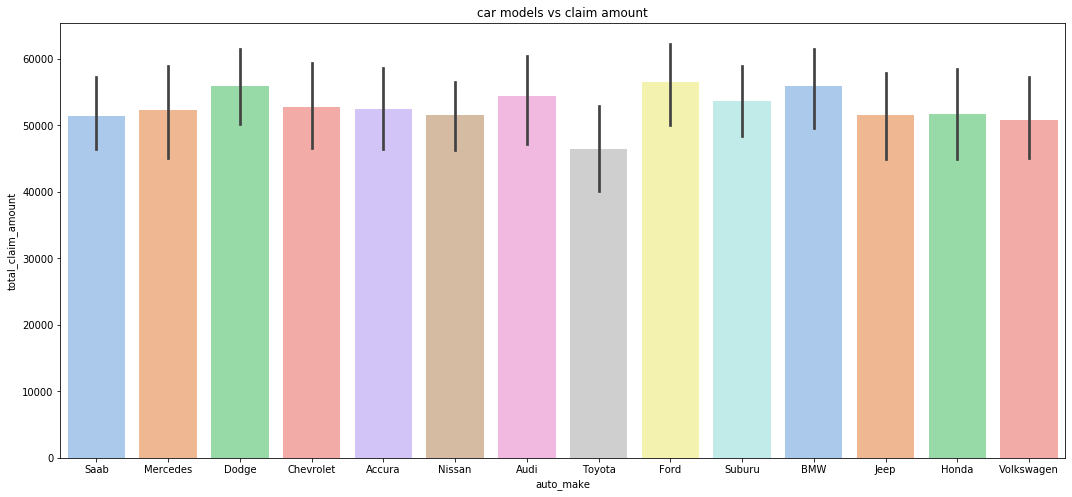

In [18]:
plt.figure(figsize = (18, 8))
sns.barplot(x = 'auto_make', y = 'total_claim_amount', data = df, palette ='pastel')

plt.title('car models vs claim amount')
#dodge ford nd bmw owners get the highest claim amount

Text(0.5, 1.0, 'hobbies vs claim amount')

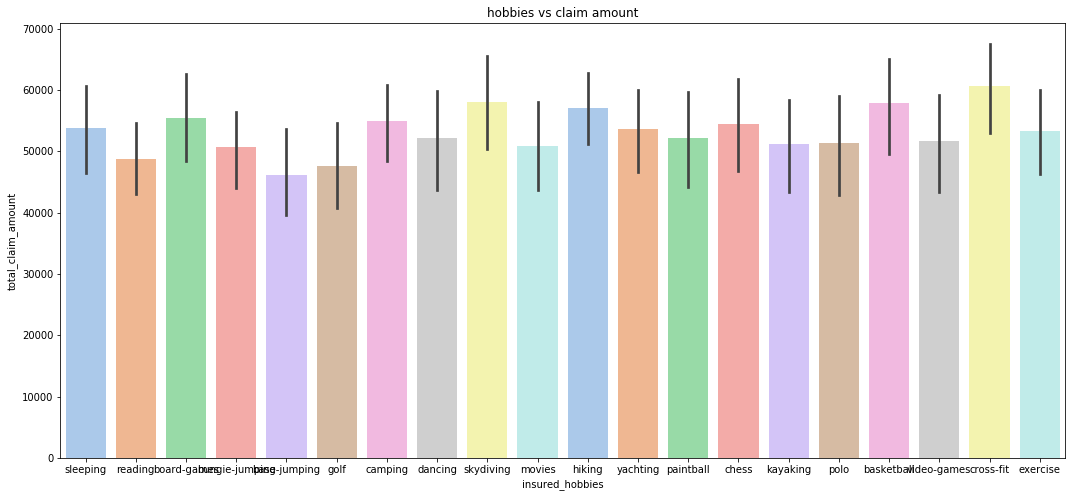

In [19]:
plt.figure(figsize = (18, 8))
sns.barplot(x = 'insured_hobbies', y = 'total_claim_amount', data = df, palette ='pastel')

plt.title('hobbies vs claim amount')

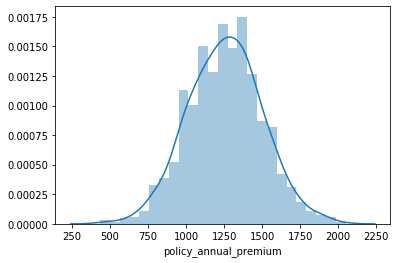

In [20]:
sns.distplot(df['policy_annual_premium'])
#mostly between 500 to 2000

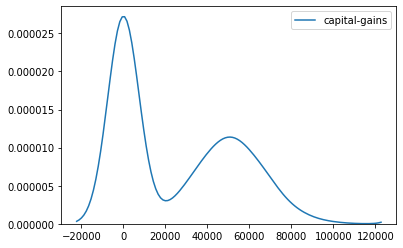

In [21]:
sns.kdeplot(df['capital-gains'])
#most value lies till 2000 nd rest values also present from 2000 to 10000

In [22]:
df.corr()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
months_as_customer,1.000000,0.922098,0.057555,0.026807,0.005018,0.015498,0.017895,0.006399,0.020209,0.070639,0.014736,-0.010162,0.058383,0.062108,0.065329,0.034940,0.061013,-0.000292
age,0.922098,1.000000,0.059413,0.029188,0.014404,0.018126,0.025604,-0.007075,0.007368,0.087161,0.022102,-0.015679,0.052359,0.069863,0.075522,0.060898,0.062588,0.001354
policy_number,0.057555,0.059413,1.000000,-0.006738,0.022566,0.008968,0.007083,0.009802,-0.005669,0.000113,0.013432,-0.004558,-0.012661,-0.018009,-0.008762,-0.010678,-0.020184,-0.000183
policy_deductable,0.026807,0.029188,-0.006738,1.000000,-0.003245,0.010870,0.004545,0.035212,-0.023544,0.060935,0.051214,-0.022765,0.066639,0.022839,0.039107,0.064792,0.005269,0.026105
policy_annual_premium,0.005018,0.014404,0.022566,-0.003245,1.000000,-0.006247,0.032354,-0.013738,0.023547,-0.001578,-0.045991,0.026780,0.002332,0.009094,-0.017633,-0.011654,0.020246,-0.049226
umbrella_limit,0.015498,0.018126,0.008968,0.010870,-0.006247,1.000000,0.019671,-0.047268,-0.024056,-0.023257,-0.021270,0.022743,-0.006738,-0.040344,-0.045412,-0.023790,-0.038584,0.009893
insured_zip,0.017895,0.025604,0.007083,0.004545,0.032354,0.019671,1.000000,0.006303,0.049372,0.008274,0.027448,0.028695,0.019805,-0.033873,-0.017495,-0.006841,-0.041083,-0.032736
capital-gains,0.006399,-0.007075,0.009802,0.035212,-0.013738,-0.047268,0.006303,1.000000,-0.046904,-0.016406,0.061643,0.055829,-0.017651,0.015980,0.025934,-0.000779,0.015836,0.031398
capital-loss,0.020209,0.007368,-0.005669,-0.023544,0.023547,-0.024056,0.049372,-0.046904,1.000000,-0.025054,-0.014895,-0.024418,-0.041330,-0.036060,-0.046060,-0.022863,-0.032665,-0.056615
incident_hour_of_the_day,0.070639,0.087161,0.000113,0.060935,-0.001578,-0.023257,0.008274,-0.016406,-0.025054,1.000000,0.120794,-0.034563,0.006527,0.217702,0.165768,0.179536,0.215626,0.021368


In [23]:
df1_sc = df1[["months_as_customer","age","policy_deductable","policy_annual_premium","umbrella_limit","capital-gains","capital-loss","incident_hour_of_the_day","number_of_vehicles_involved","bodily_injuries","witnesses","total_claim_amount","injury_claim","property_claim","vehicle_claim"]].copy()
df1_sc.head()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim
0,328,48,1000,1406.91,0,53300,0,5,1,1,2,71610,6510,13020,52080
1,228,42,2000,1197.22,5000000,0,0,8,1,0,0,5070,780,780,3510
2,134,29,2000,1413.14,5000000,35100,0,7,3,2,3,34650,7700,3850,23100
3,256,41,2000,1415.74,6000000,48900,-62400,5,1,1,2,63400,6340,6340,50720
4,228,44,1000,1583.91,6000000,66000,-46000,20,1,0,1,6500,1300,650,4550


In [24]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [25]:
df1_cat = df1[[
"insured_sex",
"insured_occupation",
"insured_education_level",                     
"insured_hobbies",                
"insured_relationship",                
"incident_type",                   
"collision_type",                  
"incident_severity",              
"authorities_contacted",          
"incident_state",               
"incident_city",                  
"incident_location",  "property_damage",      "police_report_available",          "auto_make",   "fraud_reported"                    
                            ]].copy()


In [26]:
Num_val = {'FEMALE':1, 'MALE':0}
df1_cat['insured_sex'] = df1_cat['insured_sex'].apply(lambda x: Num_val[x])
df1_cat.head()

,insured_sex,insured_occupation,insured_education_level,insured_hobbies,insured_relationship,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,property_damage,police_report_available,auto_make,fraud_reported
0,0,craft-repair,MD,sleeping,husband,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,YES,YES,Saab,Y
1,0,machine-op-inspct,MD,reading,other-relative,Vehicle Theft,Rear Collision,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,NO,NO,Mercedes,Y
2,1,sales,PhD,board-games,own-child,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,NO,NO,Dodge,N
3,1,armed-forces,PhD,board-games,unmarried,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,NO,NO,Chevrolet,Y
4,0,sales,Associate,board-games,unmarried,Vehicle Theft,Rear Collision,Minor Damage,None,NY,Arlington,3041 3rd Ave,NO,NO,Accura,N


In [27]:
Num_val = {'YES':1, 'NO':0}
df1_cat['property_damage'] = df1_cat["property_damage"].apply(lambda x: Num_val[x])
df1_cat.head()

,insured_sex,insured_occupation,insured_education_level,insured_hobbies,insured_relationship,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,property_damage,police_report_available,auto_make,fraud_reported
0,0,craft-repair,MD,sleeping,husband,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,1,YES,Saab,Y
1,0,machine-op-inspct,MD,reading,other-relative,Vehicle Theft,Rear Collision,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,0,NO,Mercedes,Y
2,1,sales,PhD,board-games,own-child,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,0,NO,Dodge,N
3,1,armed-forces,PhD,board-games,unmarried,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,0,NO,Chevrolet,Y
4,0,sales,Associate,board-games,unmarried,Vehicle Theft,Rear Collision,Minor Damage,None,NY,Arlington,3041 3rd Ave,0,NO,Accura,N


In [28]:
Num_val = {'YES':1, 'NO':0}
df1_cat['police_report_available'] = df1_cat["police_report_available"].apply(lambda x: Num_val[x])
df1_cat.head()

,insured_sex,insured_occupation,insured_education_level,insured_hobbies,insured_relationship,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,property_damage,police_report_available,auto_make,fraud_reported
0,0,craft-repair,MD,sleeping,husband,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,1,1,Saab,Y
1,0,machine-op-inspct,MD,reading,other-relative,Vehicle Theft,Rear Collision,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,0,0,Mercedes,Y
2,1,sales,PhD,board-games,own-child,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,0,0,Dodge,N
3,1,armed-forces,PhD,board-games,unmarried,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,0,0,Chevrolet,Y
4,0,sales,Associate,board-games,unmarried,Vehicle Theft,Rear Collision,Minor Damage,None,NY,Arlington,3041 3rd Ave,0,0,Accura,N


In [29]:
Num_val = {'Y':1, 'N':0}
df1_cat['fraud_reported'] = df1_cat["fraud_reported"].apply(lambda x: Num_val[x])
df1_cat.head()

,insured_sex,insured_occupation,insured_education_level,insured_hobbies,insured_relationship,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,property_damage,police_report_available,auto_make,fraud_reported
0,0,craft-repair,MD,sleeping,husband,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,1,1,Saab,1
1,0,machine-op-inspct,MD,reading,other-relative,Vehicle Theft,Rear Collision,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,0,0,Mercedes,1
2,1,sales,PhD,board-games,own-child,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,0,0,Dodge,0
3,1,armed-forces,PhD,board-games,unmarried,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,0,0,Chevrolet,1
4,0,sales,Associate,board-games,unmarried,Vehicle Theft,Rear Collision,Minor Damage,None,NY,Arlington,3041 3rd Ave,0,0,Accura,0


In [30]:
df1_cat = pd.get_dummies(df1_cat)
df1_cat.head()

,insured_sex,property_damage,police_report_available,fraud_reported,insured_occupation_adm-clerical,insured_occupation_armed-forces,insured_occupation_craft-repair,insured_occupation_exec-managerial,insured_occupation_farming-fishing,insured_occupation_handlers-cleaners,...,auto_make_Dodge,auto_make_Ford,auto_make_Honda,auto_make_Jeep,auto_make_Mercedes,auto_make_Nissan,auto_make_Saab,auto_make_Suburu,auto_make_Toyota,auto_make_Volkswagen
0,0,1,1,1,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,1,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
df1_final = pd.concat([df1_sc, df1_cat], axis=1)
df1_final.head()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,...,auto_make_Dodge,auto_make_Ford,auto_make_Honda,auto_make_Jeep,auto_make_Mercedes,auto_make_Nissan,auto_make_Saab,auto_make_Suburu,auto_make_Toyota,auto_make_Volkswagen
0,328,48,1000,1406.91,0,53300,0,5,1,1,...,0,0,0,0,0,0,1,0,0,0
1,228,42,2000,1197.22,5000000,0,0,8,1,0,...,0,0,0,0,1,0,0,0,0,0
2,134,29,2000,1413.14,5000000,35100,0,7,3,2,...,1,0,0,0,0,0,0,0,0,0
3,256,41,2000,1415.74,6000000,48900,-62400,5,1,1,...,0,0,0,0,0,0,0,0,0,0
4,228,44,1000,1583.91,6000000,66000,-46000,20,1,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
x = df1_final.drop('fraud_reported', axis = 1)
y= df1_final['fraud_reported']


In [33]:
lm = LogisticRegression()

In [34]:
from sklearn.decomposition import PCA
pca_new = PCA(n_components=10)
x = pca_new.fit_transform(x)

In [35]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=50)

In [36]:
lm.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
lm = LogisticRegression()
lm.fit(x_train, y_train)
lm_predict = lm.predict(x_test)

In [38]:
lm_conf_matrix = confusion_matrix(y_test, lm_predict)
lm_acc_score = accuracy_score(y_test, lm_predict)
print(lm_conf_matrix)
print(lm_acc_score)

[[ 95 129]
 [ 27  49]]
0.48


In [39]:
df1_final.corr()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,...,auto_make_Dodge,auto_make_Ford,auto_make_Honda,auto_make_Jeep,auto_make_Mercedes,auto_make_Nissan,auto_make_Saab,auto_make_Suburu,auto_make_Toyota,auto_make_Volkswagen
months_as_customer,1.000000,0.922098,0.026807,0.005018,0.015498,0.006399,0.020209,0.070639,0.014736,-0.010162,...,-0.044926,0.015478,-0.039476,0.016515,0.095613,-0.032650,0.041350,0.018059,-0.037225,0.031905
age,0.922098,1.000000,0.029188,0.014404,0.018126,-0.007075,0.007368,0.087161,0.022102,-0.015679,...,-0.026565,0.003279,-0.037517,0.028231,0.083643,-0.034264,0.041219,0.002485,-0.046058,0.030235
policy_deductable,0.026807,0.029188,1.000000,-0.003245,0.010870,0.035212,-0.023544,0.060935,0.051214,-0.022765,...,0.003737,0.007642,-0.010615,0.025428,-0.038736,-0.000659,-0.056536,0.003737,0.003076,0.004884
policy_annual_premium,0.005018,0.014404,-0.003245,1.000000,-0.006247,-0.013738,0.023547,-0.001578,-0.045991,0.026780,...,-0.003080,-0.007118,-0.027782,0.059603,-0.067454,-0.047015,0.076691,-0.038238,0.004869,0.023443
umbrella_limit,0.015498,0.018126,0.010870,-0.006247,1.000000,-0.047268,-0.024056,-0.023257,-0.021270,0.022743,...,-0.030628,0.024813,-0.018252,0.031758,0.025500,-0.037152,-0.006549,-0.016181,-0.005240,0.022717
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
auto_make_Nissan,-0.032650,-0.034264,-0.000659,-0.047015,-0.037152,0.092127,0.004090,-0.038767,0.045983,0.016486,...,-0.085770,-0.081017,-0.070169,-0.077943,-0.076689,1.000000,-0.085770,-0.085770,-0.079798,-0.078565
auto_make_Saab,0.041350,0.041219,-0.056536,0.076691,-0.006549,-0.046626,0.003109,0.055429,0.035761,-0.028599,...,-0.086957,-0.082138,-0.071140,-0.079022,-0.077750,-0.085770,1.000000,-0.086957,-0.080902,-0.079652
auto_make_Suburu,0.018059,0.002485,0.003737,-0.038238,-0.016181,0.027867,0.002480,-0.031577,0.003185,-0.010612,...,-0.086957,-0.082138,-0.071140,-0.079022,-0.077750,-0.085770,-0.086957,1.000000,-0.080902,-0.079652
auto_make_Toyota,-0.037225,-0.046058,0.003076,0.004869,-0.005240,0.051164,0.020379,-0.024301,-0.014355,0.007459,...,-0.080902,-0.076419,-0.066187,-0.073520,-0.072337,-0.079798,-0.080902,-0.080902,1.000000,-0.074106


In [40]:
# lets select the most important columns as features to improve our accuracy as there are approx 1000 columns lets reduce the columns nd improve our accuracy score


In [41]:
df2_sc = df1[["months_as_customer","age","policy_annual_premium","capital-gains","capital-loss","incident_hour_of_the_day","number_of_vehicles_involved","witnesses","total_claim_amount"]].copy()
df2_sc.head()

,months_as_customer,age,policy_annual_premium,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,witnesses,total_claim_amount
0,328,48,1406.91,53300,0,5,1,2,71610
1,228,42,1197.22,0,0,8,1,0,5070
2,134,29,1413.14,35100,0,7,3,3,34650
3,256,41,1415.74,48900,-62400,5,1,2,63400
4,228,44,1583.91,66000,-46000,20,1,1,6500


In [42]:
df2_cat = df1[[
"insured_sex",
"insured_occupation",                  
"insured_hobbies",                                
"incident_type",                   
"collision_type",                  
"incident_severity",              
"authorities_contacted",          
"fraud_reported"                    
                            ]].copy()


In [43]:
Num_val = {'FEMALE':1, 'MALE':0}
df2_cat['insured_sex'] = df2_cat['insured_sex'].apply(lambda x: Num_val[x])

In [44]:
Num_val = {'Y':1, 'N':0}
df2_cat['fraud_reported'] = df2_cat["fraud_reported"].apply(lambda x: Num_val[x])


In [45]:
df2_cat = pd.get_dummies(df2_cat)
df2_cat.head()

,insured_sex,fraud_reported,insured_occupation_adm-clerical,insured_occupation_armed-forces,insured_occupation_craft-repair,insured_occupation_exec-managerial,insured_occupation_farming-fishing,insured_occupation_handlers-cleaners,insured_occupation_machine-op-inspct,insured_occupation_other-service,...,collision_type_Side Collision,incident_severity_Major Damage,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Ambulance,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police
0,0,1,0,0,1,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,1
1,0,1,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
2,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,1,1,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0


In [46]:
df2_final = pd.concat([df2_sc, df2_cat], axis=1)
df2_final.head()
#now our data is more confined with 61 columns earlier there were more than 1000 columns

,months_as_customer,age,policy_annual_premium,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,witnesses,total_claim_amount,insured_sex,...,collision_type_Side Collision,incident_severity_Major Damage,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Ambulance,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police
0,328,48,1406.91,53300,0,5,1,2,71610,0,...,1,1,0,0,0,0,0,0,0,1
1,228,42,1197.22,0,0,8,1,0,5070,0,...,0,0,1,0,0,0,0,0,0,1
2,134,29,1413.14,35100,0,7,3,3,34650,1,...,0,0,1,0,0,0,0,0,0,1
3,256,41,1415.74,48900,-62400,5,1,2,63400,1,...,0,1,0,0,0,0,0,0,0,1
4,228,44,1583.91,66000,-46000,20,1,1,6500,0,...,0,0,1,0,0,0,0,1,0,0


In [47]:
x = df2_final.drop('fraud_reported', axis = 1)
y= df2_final['fraud_reported']

In [48]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x = sc.fit_transform(x)

In [49]:
lm = LogisticRegression()

In [50]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=50)

In [51]:
lm.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
lm = LogisticRegression()
lm.fit(x_train, y_train)
lm_predict = lm.predict(x_test)

In [53]:
lm_conf_matrix = confusion_matrix(y_test, lm_predict)
lm_acc_score = accuracy_score(y_test, lm_predict)
print(lm_conf_matrix)
print(lm_acc_score)

[[218  27]
 [ 24  61]]
0.8454545454545455


In [54]:
#accuracy has improved from 48 to  84

In [55]:
from sklearn.ensemble import AdaBoostClassifier
ad=AdaBoostClassifier(n_estimators=250)
ad.fit(x_train,y_train)
ad_pred=ad.predict(x_test)
print(accuracy_score(y_test,ad_pred))
print(confusion_matrix(y_test,ad_pred))
print(classification_report(y_test,ad_pred))

0.806060606060606
[[216  29]
 [ 35  50]]
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       245
           1       0.63      0.59      0.61        85

    accuracy                           0.81       330
   macro avg       0.75      0.73      0.74       330
weighted avg       0.80      0.81      0.80       330



In [56]:
from sklearn.svm import SVC
def svmkernel(ker):
    svc=SVC(kernel=ker)
    score=cross_val_score(svc,x,y,cv=5)

    print('Mean Scores',score.mean())
    print('Standard deviation',score.std())

    y_pred=cross_val_predict(svc,x,y,cv=5)


    conf_mat=confusion_matrix(y,y_pred)
    print(conf_mat)


In [57]:
svmkernel('rbf')

Mean Scores 0.851067151678792
Standard deviation 0.020855322522429047
[[668  85]
 [ 64 183]]


In [58]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
rf_predict=rf.predict(x_test)

In [59]:
rf_conf_matrix = confusion_matrix(y_test, rf_predict)
rf_acc_score = accuracy_score(y_test, rf_predict)
print(rf_conf_matrix)
print(rf_acc_score)

[[227  18]
 [ 55  30]]
0.7787878787878788


In [60]:
from sklearn.neighbors import KNeighborsClassifier

In [61]:
knn=KNeighborsClassifier(n_neighbors=12)
knn.fit(x_train,y_train)
predknn=knn.predict(x_test)

In [62]:
print(classification_report(y_test,predknn))

              precision    recall  f1-score   support

           0       0.78      0.95      0.86       245
           1       0.61      0.24      0.34        85

    accuracy                           0.76       330
   macro avg       0.69      0.59      0.60       330
weighted avg       0.74      0.76      0.72       330



In [63]:
from sklearn.tree import DecisionTreeClassifier

In [64]:
dct=DecisionTreeClassifier()
dct.fit(x_train,y_train)
preddct=dct.predict(x_test)

In [65]:
print(classification_report(y_test,preddct))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86       245
           1       0.60      0.62      0.61        85

    accuracy                           0.79       330
   macro avg       0.73      0.74      0.73       330
weighted avg       0.80      0.79      0.80       330



In [66]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [67]:
predgnb=gnb.predict(x_test)
print(accuracy_score(predgnb,y_test))

0.7454545454545455


In [68]:
from sklearn import svm,datasets
from sklearn.model_selection import GridSearchCV

parameters={'kernel':('linear','rbf'),'C':[1,10]}
svc=svm.SVC()
clf=GridSearchCV(svc,parameters)
clf.fit(x,y)
print(clf.best_score_)
print(clf.best_estimator_.kernel)
print(clf.best_params_)

0.84
linear
{'C': 1, 'kernel': 'linear'}


In [69]:
from sklearn.ensemble import GradientBoostingClassifier

In [70]:
learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in learning_rates:
    gb = GradientBoostingClassifier(n_estimators=20, learning_rate = learning_rate, max_features=2, max_depth = 2, random_state = 0)
    gb.fit(x_train, y_train)
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb.score(x_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb.score(x_test, y_test)))
    print()

Learning rate:  0.05
Accuracy score (training): 0.758
Accuracy score (validation): 0.742

Learning rate:  0.1
Accuracy score (training): 0.758
Accuracy score (validation): 0.742

Learning rate:  0.25
Accuracy score (training): 0.815
Accuracy score (validation): 0.745

Learning rate:  0.5
Accuracy score (training): 0.840
Accuracy score (validation): 0.788

Learning rate:  0.75
Accuracy score (training): 0.842
Accuracy score (validation): 0.788

Learning rate:  1
Accuracy score (training): 0.849
Accuracy score (validation): 0.779



In [71]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
lm = LogisticRegression()
lm.fit(x_train, y_train)
lm_predict = lm.predict(x_test)

In [73]:
y_pred_prob=lm.predict_proba(x_test)[:,1]

In [74]:
y_pred_prob

array([0.09514609, 0.04670931, 0.02077039, 0.82027398, 0.06012603,
       0.73554739, 0.03095091, 0.10980377, 0.01691011, 0.02689649,
       0.71882865, 0.62350432, 0.4067055 , 0.03340421, 0.01420128,
       0.097941  , 0.6378271 , 0.28626262, 0.08786577, 0.0665395 ,
       0.16530637, 0.00942224, 0.25634734, 0.06332266, 0.90815461,
       0.01823857, 0.86604729, 0.02796312, 0.03196404, 0.58952497,
       0.18504534, 0.01790378, 0.12618865, 0.0305055 , 0.01768058,
       0.07494881, 0.54759488, 0.06888927, 0.7382424 , 0.60023729,
       0.01750632, 0.05745015, 0.02434867, 0.06130014, 0.03576141,
       0.63747386, 0.14546936, 0.07839673, 0.09633335, 0.15148964,
       0.05279163, 0.02604891, 0.72453729, 0.40366782, 0.13600174,
       0.02984929, 0.67625691, 0.05188321, 0.83353515, 0.06128456,
       0.02826521, 0.03112092, 0.48596872, 0.06778315, 0.06253263,
       0.98531997, 0.24797771, 0.06606024, 0.08843066, 0.05296068,
       0.57946127, 0.69581733, 0.03116779, 0.04499306, 0.45895

In [75]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

In [76]:
fpr

array([0.        , 0.00408163, 0.0122449 , 0.0122449 , 0.01632653,
       0.01632653, 0.02040816, 0.02040816, 0.0244898 , 0.0244898 ,
       0.02857143, 0.02857143, 0.03265306, 0.03265306, 0.03673469,
       0.03673469, 0.04081633, 0.04081633, 0.04489796, 0.04489796,
       0.04897959, 0.04897959, 0.05306122, 0.05306122, 0.05714286,
       0.05714286, 0.06530612, 0.06530612, 0.06938776, 0.06938776,
       0.07755102, 0.07755102, 0.08163265, 0.08163265, 0.08571429,
       0.08571429, 0.08979592, 0.08979592, 0.10612245, 0.10612245,
       0.11428571, 0.11428571, 0.11836735, 0.11836735, 0.12244898,
       0.12244898, 0.12653061, 0.12653061, 0.13061224, 0.13061224,
       0.14285714, 0.14285714, 0.14693878, 0.14693878, 0.2244898 ,
       0.2244898 , 0.26938776, 0.26938776, 0.27755102, 0.27755102,
       0.28571429, 0.28571429, 0.30612245, 0.30612245, 0.33877551,
       0.33877551, 0.34285714, 0.34285714, 0.93469388, 0.93469388,
       0.96326531, 0.96326531, 1.        ])

In [77]:
tpr

array([0.        , 0.        , 0.        , 0.08235294, 0.08235294,
       0.09411765, 0.09411765, 0.11764706, 0.11764706, 0.12941176,
       0.12941176, 0.14117647, 0.14117647, 0.16470588, 0.16470588,
       0.18823529, 0.18823529, 0.2       , 0.2       , 0.22352941,
       0.22352941, 0.36470588, 0.36470588, 0.45882353, 0.45882353,
       0.51764706, 0.51764706, 0.54117647, 0.54117647, 0.61176471,
       0.61176471, 0.63529412, 0.63529412, 0.65882353, 0.65882353,
       0.69411765, 0.69411765, 0.70588235, 0.70588235, 0.71764706,
       0.71764706, 0.74117647, 0.74117647, 0.81176471, 0.81176471,
       0.83529412, 0.83529412, 0.84705882, 0.84705882, 0.85882353,
       0.85882353, 0.88235294, 0.88235294, 0.89411765, 0.89411765,
       0.90588235, 0.90588235, 0.91764706, 0.91764706, 0.92941176,
       0.92941176, 0.94117647, 0.94117647, 0.95294118, 0.95294118,
       0.96470588, 0.96470588, 0.97647059, 0.97647059, 0.98823529,
       0.98823529, 1.        , 1.        ])

In [78]:
thresholds

array([1.99107216, 0.99107216, 0.98531997, 0.90493496, 0.90350351,
       0.8917183 , 0.88993376, 0.88132866, 0.87976144, 0.87078161,
       0.86604729, 0.85904166, 0.85390669, 0.85248945, 0.84714262,
       0.84570731, 0.83353515, 0.82743948, 0.82696528, 0.82143919,
       0.82027398, 0.75383394, 0.74639878, 0.71882865, 0.71586851,
       0.69014333, 0.67625691, 0.67146043, 0.66589632, 0.63747386,
       0.62350432, 0.61642329, 0.60878718, 0.60023729, 0.59460904,
       0.57323349, 0.5707697 , 0.54951006, 0.52628574, 0.50512332,
       0.49651096, 0.48319644, 0.482389  , 0.39553663, 0.38459075,
       0.38172924, 0.35972502, 0.33525321, 0.32965528, 0.32891607,
       0.28626262, 0.25634734, 0.24797771, 0.23291424, 0.12967942,
       0.1291495 , 0.10885356, 0.10622362, 0.1006096 , 0.097941  ,
       0.09514609, 0.09375742, 0.08998442, 0.08995189, 0.08257013,
       0.07869976, 0.07839673, 0.07533327, 0.01589321, 0.01549139,
       0.01348535, 0.0134802 , 0.00464537])

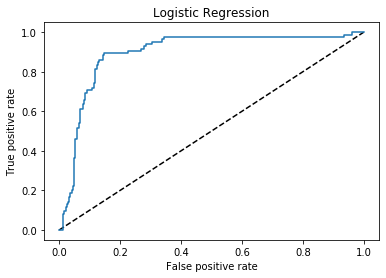

In [79]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Logistic Regression')
plt.show()

In [80]:
auc_score=roc_auc_score(y_test,lm.predict(x_test))

In [81]:
auc_score

0.8037214885954382

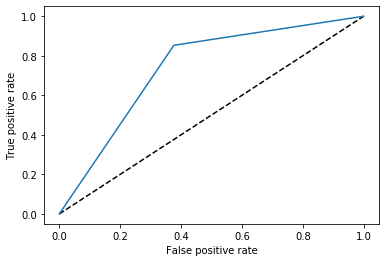

In [91]:
y_pred_prob=dct.predict_proba(x_test)[:,0]
tpr,fpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='DecisionTreeClassifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('')
plt.show()

In [89]:
auc_score=roc_auc_score(y_test,dct.predict(x_test))

In [90]:
auc_score

0.738295318127251

In [92]:
#logistic regression performs better with 84 accuracy nd auc score 80
from sklearn.externals import joblib
joblib.dump(dct,'dctauto.obj')
dct_from_joblib=joblib.load('dctauto.obj')